In [16]:
import pandas as pd
import missingno as msno
from collections import Counter
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/DD360/places_details.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DD360/places_reviews.csv')

pd.set_option('display.max_columns', None)

In [5]:
df1.head()

,place_id,name,business_status,latitude,longitude,user_ratings_total,rating,website,price_level,photos,sunday_open,sunday_close,monday_open,monday_close,tuesday_open,tuesday_close,wednesday_open,wednesday_close,thursday_open,thursday_close,friday_open,friday_close,saturday_open,saturday_close,tipo_lugar
0,ChIJ_6PxIP_-0YURb-iv-Yq3gPM,La Cocina Tradicional Mexicana,OPERATIONAL,19.388755,-99.141413,104,4.5,https://www.facebook.com/La-Cocina-Tradicional...,NaN,"[{'height': 3120, 'html_attributions': ['<a hr...",0,0,800,1700,800,1700,800,1700,800,1700,800,1700,930,1700,Comida mexicana
1,ChIJ06Wq3J4BzoUREnZuxiDcPo8,Candelilla 16,OPERATIONAL,19.297430,-99.120043,73,4.6,http://candelilla16.mx/,NaN,"[{'height': 3024, 'html_attributions': ['<a hr...",0,0,0,0,0,0,0,0,0,0,0,0,1400,1830,Comida mexicana
2,ChIJ0-IjfKoDzoURrhSoInEmyrs,Antojitos Méxicanos Don Max,OPERATIONAL,19.292602,-99.057521,94,4.7,https://antojitos-mexicanos-don-max.negocio.si...,1.0,"[{'height': 3024, 'html_attributions': ['<a hr...",1930,2200,0,0,0,0,0,0,0,0,1930,2330,1930,2330,Comida mexicana
3,ChIJ0RedUVYCzoURQcJ0Bo5LJew,Rico Amanecer,OPERATIONAL,19.304016,-99.059380,108,4.6,http://ricoamanecer.negocio.site/,NaN,"[{'height': 720, 'html_attributions': ['<a hre...",0,0,900,2200,900,2200,900,2200,900,2200,900,2200,1000,2200,Comida mexicana
4,ChIJ0Vr0QeUB0oURZfWZGMhVCpg,El Lago Restaurante,OPERATIONAL,19.416864,-99.199990,4939,4.5,http://www.lago.com.mx/,3.0,"[{'height': 4032, 'html_attributions': ['<a hr...",830,1730,730,1730,730,1730,730,1730,730,1730,730,1730,730,1730,Comida mexicana


In [6]:
df1.tail()

,place_id,name,business_status,latitude,longitude,user_ratings_total,rating,website,price_level,photos,sunday_open,sunday_close,monday_open,monday_close,tuesday_open,tuesday_close,wednesday_open,wednesday_close,thursday_open,thursday_close,friday_open,friday_close,saturday_open,saturday_close,tipo_lugar
109,ChIJU67OTNv_0YURj-nw92FLYDc,Pepe Coyotes Coyoacán,OPERATIONAL,19.349812,-99.161248,4029,4.5,http://pepecoyotes.com.mx/,2.0,"[{'height': 5184, 'html_attributions': ['<a hr...",800,2300,800,2300,800,2300,800,2300,800,2300,800,2300,800,2300,Comida mexicana
110,ChIJITgvvy__0YUR0fZG9xzbMO4,La Tecla,OPERATIONAL,19.419842,-99.165530,534,4.5,http://latecla.mx/,2.0,"[{'height': 591, 'html_attributions': ['<a hre...",1300,1830,1300,2200,1300,2200,1300,2200,1300,2200,1300,2200,1300,2200,Comida mexicana
111,ChIJ0Z9P0z7_0YURVqrnz-OpFms,Mercado Roma,OPERATIONAL,19.414149,-99.164540,11317,4.3,http://mercadoroma.com/,2.0,"[{'height': 4912, 'html_attributions': ['<a hr...",1000,1930,1000,2200,1000,2200,1000,2200,1000,2200,1000,2200,1000,2200,Comida mexicana
112,ChIJY3GHMuT_0YURoETJ-mqSwEo,MercadoRoma Coyoacán,OPERATIONAL,19.345478,-99.174103,1988,4.3,http://mercadoroma.com/,NaN,"[{'height': 3024, 'html_attributions': ['<a hr...",1000,1930,1000,2200,1000,2200,1000,2200,1000,2200,1000,2200,1000,2200,Comida mexicana
113,ChIJRU2FLk__0YURikrh-RZMung,El Pialadero de Guadalajara,OPERATIONAL,19.421628,-99.174192,3171,4.3,https://www.elpialaderodeguadalajara.mx/,2.0,"[{'height': 3950, 'html_attributions': ['<a hr...",1000,1900,1000,1800,1000,1800,1000,1800,1000,1800,1000,1900,1000,1900,Comida mexicana


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   place_id            114 non-null    object 
 1   name                114 non-null    object 
 2   business_status     114 non-null    object 
 3   latitude            114 non-null    float64
 4   longitude           114 non-null    float64
 5   user_ratings_total  114 non-null    int64  
 6   rating              114 non-null    float64
 7   website             79 non-null     object 
 8   price_level         73 non-null     float64
 9   photos              114 non-null    object 
 10  sunday_open         114 non-null    int64  
 11  sunday_close        114 non-null    int64  
 12  monday_open         114 non-null    int64  
 13  monday_close        114 non-null    int64  
 14  tuesday_open        114 non-null    int64  
 15  tuesday_close       114 non-null    int64  
 16  wednesda

In [8]:
df1.describe()

,latitude,longitude,user_ratings_total,rating,price_level,sunday_open,sunday_close,monday_open,monday_close,tuesday_open,tuesday_close,wednesday_open,wednesday_close,thursday_open,thursday_close,friday_open,friday_close,saturday_open,saturday_close
count,114.000000,114.000000,114.000000,114.000000,73.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,19.394769,-99.161485,2181.482456,4.544737,2.000000,819.473684,1303.245614,784.473684,1401.447368,857.631579,1548.991228,938.947368,1667.412281,976.350877,1745.482456,1028.947368,1788.991228,996.552632,1705.438596
std,0.067092,0.052567,6227.755492,0.134422,0.763763,522.597058,890.519880,491.180792,912.908830,455.472725,825.574131,397.855687,725.674917,377.587333,657.169436,350.169032,619.393859,408.122988,712.978472
min,19.193311,-99.292519,9.000000,4.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.352408,-99.190567,171.500000,4.500000,1.000000,700.000000,0.000000,700.000000,0.000000,800.000000,1600.000000,800.000000,1700.000000,800.000000,1700.000000,800.000000,1700.000000,800.000000,1700.000000
50%,19.407133,-99.165035,509.000000,4.600000,2.000000,900.000000,1800.000000,865.000000,1800.000000,900.000000,1830.000000,900.000000,1865.000000,900.000000,1900.000000,965.000000,1900.000000,1000.000000,1900.000000
75%,19.433936,-99.143535,1649.750000,4.600000,2.000000,1222.500000,1922.500000,1175.000000,2200.000000,1222.500000,2200.000000,1300.000000,2200.000000,1300.000000,2200.000000,1300.000000,2200.000000,1300.000000,2200.000000
max,19.496477,-99.013698,56676.000000,4.900000,4.000000,2000.000000,2300.000000,1800.000000,2330.000000,2000.000000,2330.000000,2000.000000,2330.000000,2000.000000,2330.000000,2000.000000,2330.000000,2000.000000,2330.000000


<Axes: >

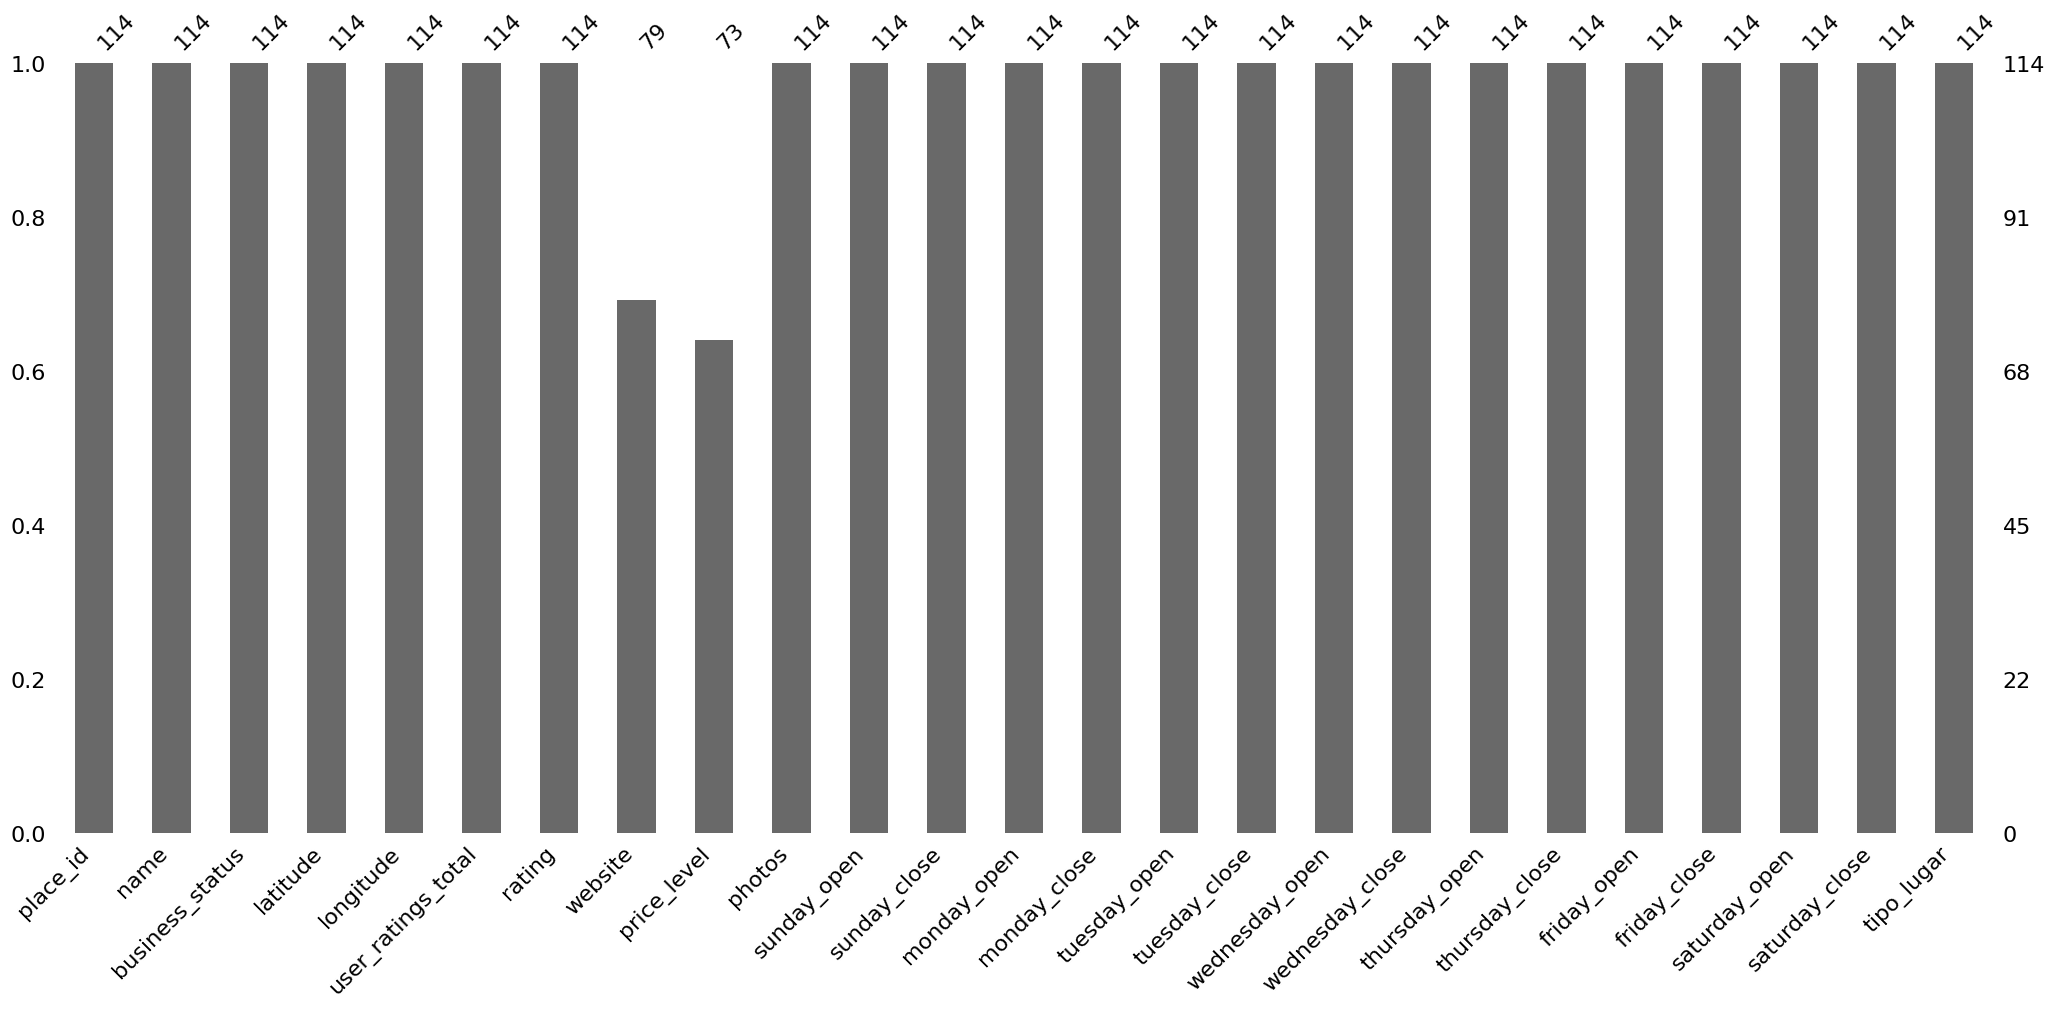

In [9]:
msno.bar(df1)

In [10]:
df2.head()

,url,reviewer,reviewer_avatar,datetime,rating,text,language,id,place_id
0,https://www.google.com/maps/reviews/data=!4m5!...,Josial Iszsa,https://lh3.googleusercontent.com/a-/AOh14GhZ0...,2020-07-30T00:26:00Z,5.0,"Higiene, medidas de sana distancia, excelente ...",es,17546225955757877359-1596057977.804,ChIJ_6PxIP_-0YURb-iv-Yq3gPM
1,https://www.google.com/maps/reviews/data=!4m5!...,Osvaldo Caballero,https://lh4.googleusercontent.com/-5ebzE6LwgJ4...,2020-07-08T00:18:00Z,5.0,Buen lugar para comer y pasar el rato,es,17546225955757877359-1594156694.121,ChIJ_6PxIP_-0YURb-iv-Yq3gPM
2,https://www.google.com/maps/reviews/data=!4m5!...,Marbella Miss,https://lh3.googleusercontent.com/a-/AOh14Gjc-...,2020-03-19T07:53:00Z,5.0,Súper delicioso todo y muy económico 🥰❤️❤️,es,17546225955757877359-1584593609.046,ChIJ_6PxIP_-0YURb-iv-Yq3gPM
3,https://www.google.com/maps/reviews/data=!4m5!...,Erick romero casas,https://lh3.googleusercontent.com/a-/AOh14GjFo...,2020-03-13T00:27:00Z,4.0,"Muy buen servicio, costos un poco elevados",es,17546225955757877359-1584048420.225,ChIJ_6PxIP_-0YURb-iv-Yq3gPM
4,https://www.google.com/maps/reviews/data=!4m5!...,Yoscelina Gomez,https://lh3.googleusercontent.com/a-/AOh14Gig6...,2020-03-08T03:49:00Z,3.0,"Comida rica, buen precio, atención normal, la ...",es,17546225955757877359-1583628551.982,ChIJ_6PxIP_-0YURb-iv-Yq3gPM


In [11]:
df2.tail()

,url,reviewer,reviewer_avatar,datetime,rating,text,language,id,place_id
47014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47019 entries, 0 to 47018
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              9183 non-null   object 
 1   reviewer         9183 non-null   object 
 2   reviewer_avatar  9183 non-null   object 
 3   datetime         9183 non-null   object 
 4   rating           9183 non-null   float64
 5   text             9183 non-null   object 
 6   language         9183 non-null   object 
 7   id               9183 non-null   object 
 8   place_id         9183 non-null   object 
dtypes: float64(1), object(8)
memory usage: 3.2+ MB


In [13]:
df2.describe()

,rating
count,9183.000000
mean,4.565937
std,0.873371
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<Axes: >

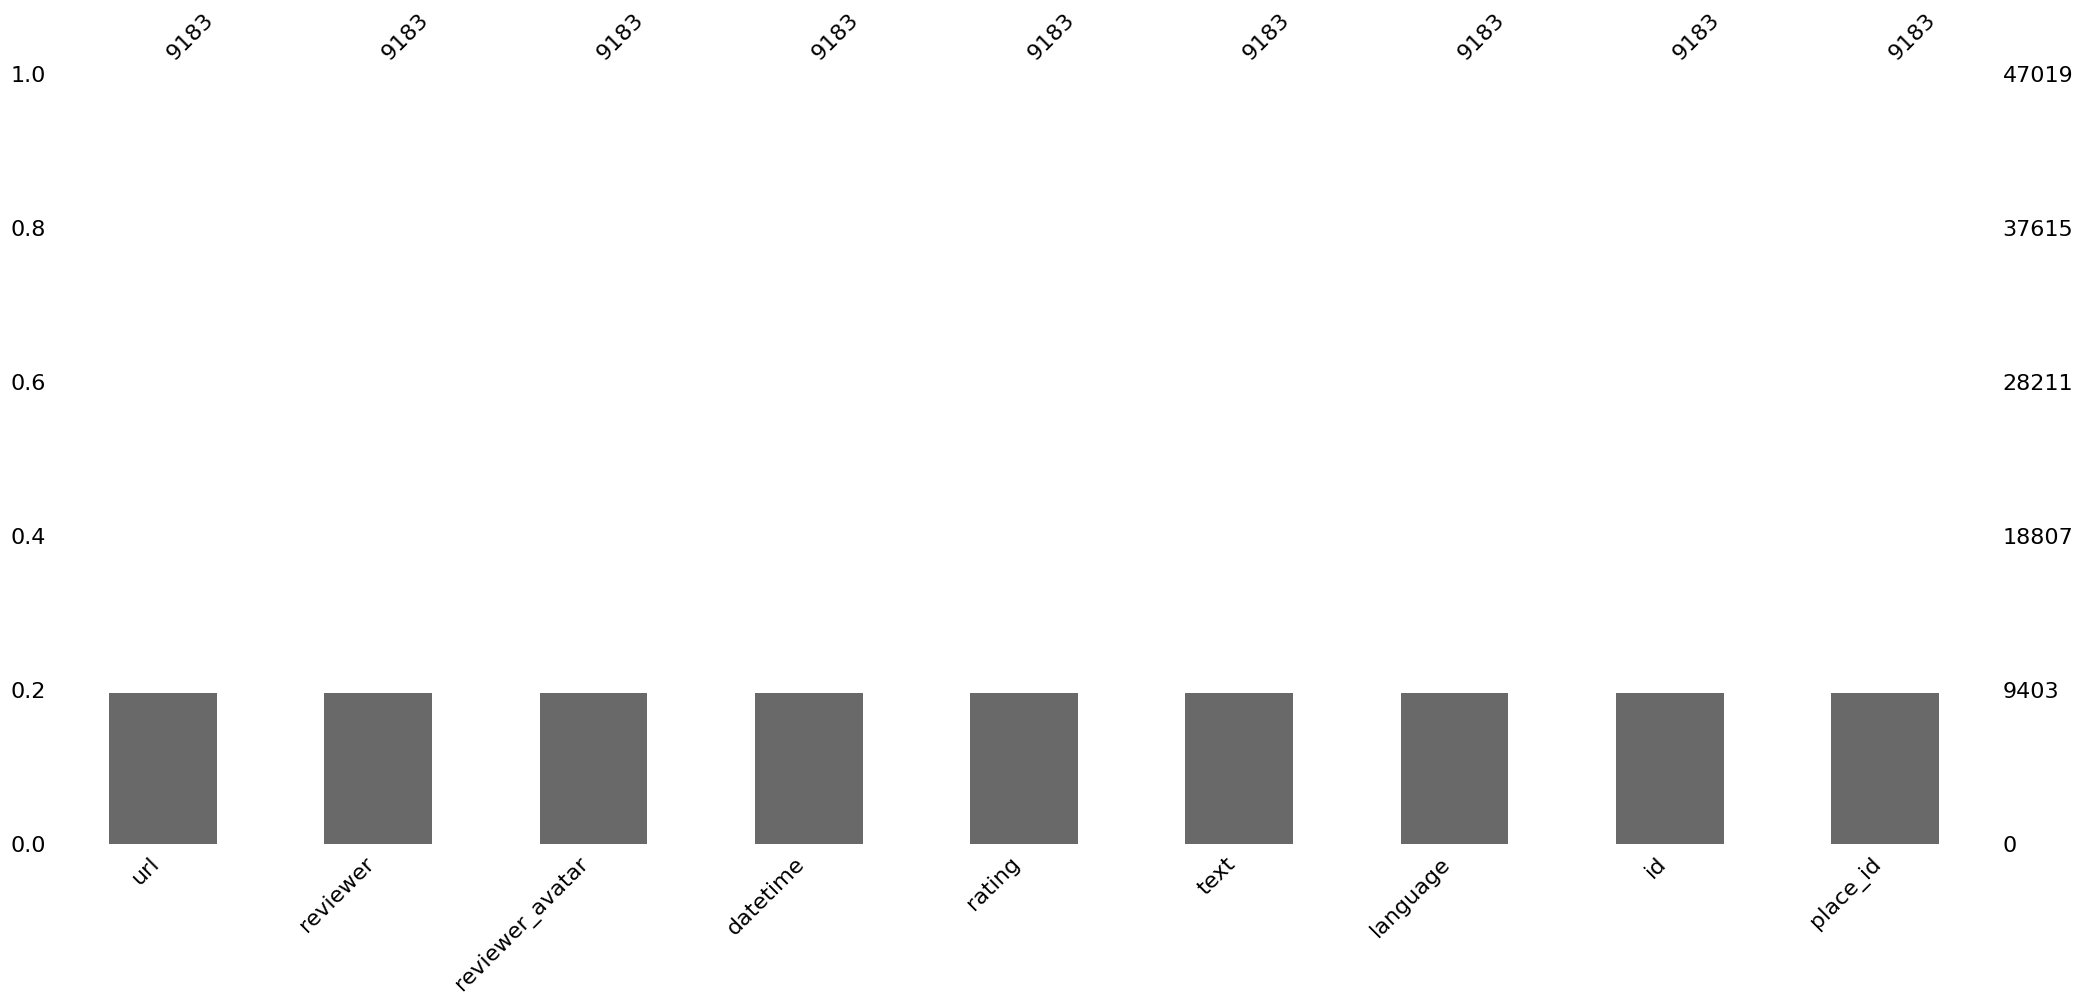

In [14]:
msno.bar(df2)

In [21]:
# Concatenar todos los textos de las reseñas
all_reviews_text = ' '.join(df2['text'].dropna())

# Eliminar caracteres especiales y convertir a minúsculas
all_reviews_text = re.sub(r'[^a-zA-Z0-9áéíóúñüÁÉÍÓÚÑÜ\s]', '', all_reviews_text).lower()

# Dividir el texto en palabras individuales
words = all_reviews_text.split()

# Contar la frecuencia de cada palabra
word_counts = Counter(words)

# Obtener las 109 palabras más comunes
top_words = word_counts.most_common(100)

# Imprimir las palabras más comunes
for word, count in top_words:
    print(f'{word}: {count}')

y: 5400
de: 5102
muy: 4036
la: 4013
el: 3199
es: 2373
excelente: 2121
que: 2116
lugar: 2092
comida: 1993
los: 1894
un: 1788
en: 1748
a: 1630
servicio: 1507
para: 1408
con: 1379
buen: 1316
no: 1216
atención: 1140
las: 1127
buena: 1089
lo: 970
una: 854
pero: 846
the: 826
todo: 768
son: 764
rico: 748
sabor: 727
por: 721
se: 684
me: 682
bien: 593
and: 543
del: 512
precios: 500
delicioso: 488
mejor: 477
precio: 455
su: 434
al: 433
rica: 418
platillos: 418
calidad: 417
si: 407
te: 398
recomendable: 392
bueno: 389
comer: 385
más: 383
como: 356
agradable: 353
tacos: 352
ambiente: 341
hay: 332
deliciosa: 332
siempre: 330
buenos: 300
está: 297
recomiendo: 293
was: 289
poco: 283
sus: 283
super: 274
o: 265
alimentos: 262
mucho: 261
mi: 256
to: 251
birria: 248
tienen: 246
sin: 242
mejores: 239
variedad: 237
food: 236
este: 233
gran: 230
of: 222
esta: 213
is: 209
personal: 207
ya: 206
ricos: 206
i: 205
restaurante: 205
deliciosos: 204
tiene: 204
menú: 201
sazón: 196
están: 193
in: 185
solo: 184
buen